In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Load original dataset
df = pd.read_csv('/content/drive/MyDrive/online_payments_fraud_detection_dataset.csv')



Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save first 50000 rows to a new CSV file
df.head(500000).to_csv('fraud_detection_sample.csv', index=False)
from google.colab import files
files.download('fraud_detection_sample.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.shape

(6362620, 11)

In [ ]:

df.info()
df.head(10) #checking out the first 10 rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
df.describe() #information regarding the numerical columns

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

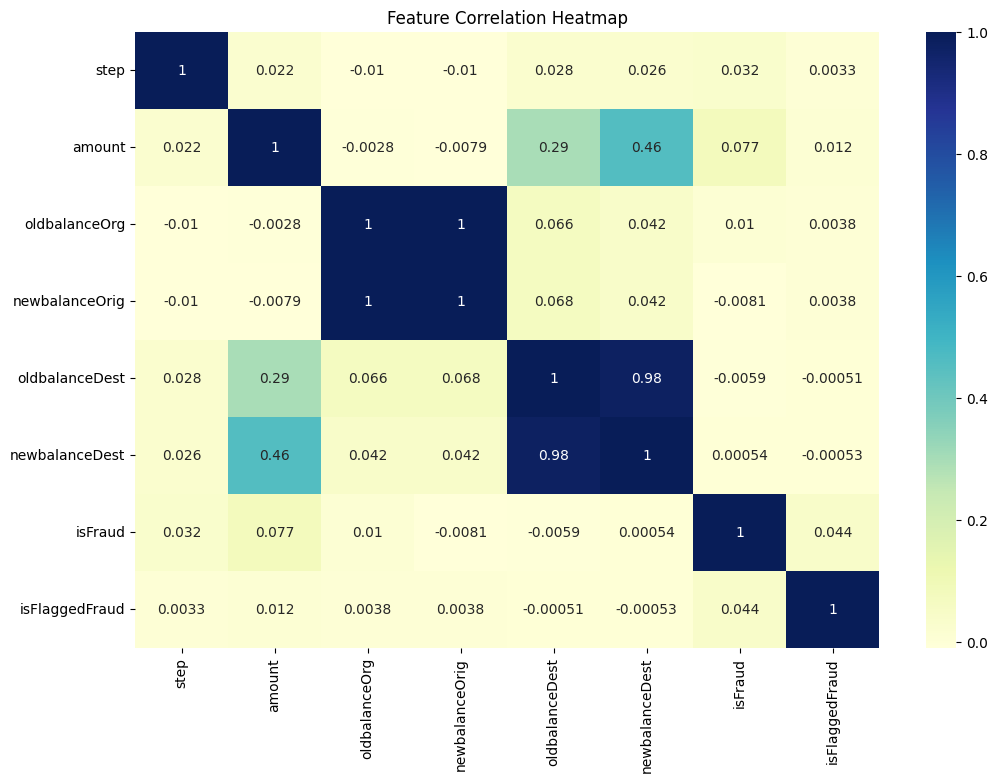

In [ ]:
#heatmap using seaborn (shows the correlation)
plt.figure(figsize=(12, 8))
numeric_df=df.select_dtypes(include='number') #keeping the numeric columns only
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='YlGnBu')
plt.title('Feature Correlation Heatmap')
plt.show()

Class distribution: isFraud
0    6354407
1       8213
Name: count, dtype: int64


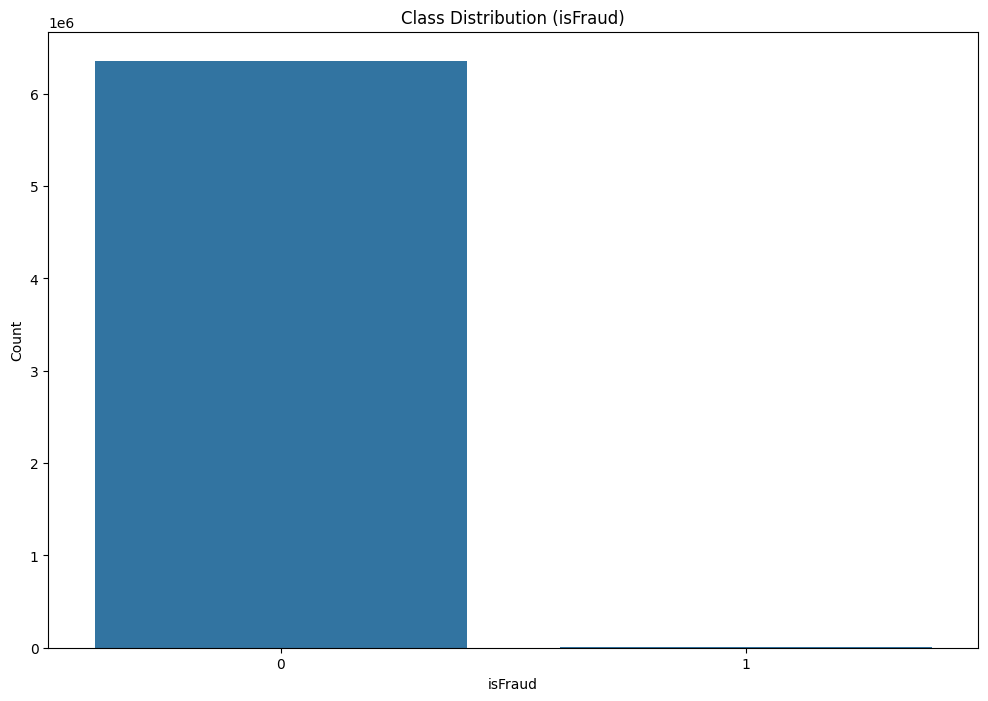

In [ ]:
#bar plot for checking imbalance in output
output_count = df['isFraud'].value_counts()
print(f"Class distribution: {output_count}")
plt.figure(figsize=(12,8))
sns.barplot(x=output_count.index, y=output_count.values)
plt.title('Class Distribution (isFraud)')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()


EDA analysis


In [ ]:

#Dividing into numerical and categorical values
numerical_vals=df.select_dtypes(include= 'number')
numerical_features=numerical_vals.columns.tolist()
print(f"There are {len(numerical_features)} numerical features.")
print(f"The features are: {numerical_features}")
categorical_vals=df.select_dtypes(include= 'object')
categorical_features=categorical_vals.columns.tolist()
print(f"There are {len(categorical_features)} categorical features.")
print(f"The features are: {categorical_features}")

There are 8 numerical features.
The features are: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
There are 3 categorical features.
The features are: ['type', 'nameOrig', 'nameDest']


In [ ]:
#summary (transposed) stats of numerical features
numerical_vals.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [ ]:
#summary (transposed) stats of categorical features
categorical_vals.describe().T

,count,unique,top,freq
type,6362620,5,CASH_OUT,2237500
nameOrig,6362620,6353307,C1530544995,3
nameDest,6362620,2722362,C1286084959,113


In [ ]:
#variance of numerical data
numerical_vals.var()

,0
step,2.025839e+04
amount,3.646448e+11
oldbalanceOrg,8.341946e+12
newbalanceOrig,8.550060e+12
oldbalanceDest,1.155443e+13
newbalanceDest,1.349922e+13
isFraud,1.289154e-03
isFlaggedFraud,2.514681e-06


In [ ]:
#skew in numerical features
numerical_vals.skew()

,0
step,0.375177
amount,30.993949
oldbalanceOrg,5.249136
newbalanceOrig,5.176884
oldbalanceDest,19.921758
newbalanceDest,19.352302
isFraud,27.779538
isFlaggedFraud,630.603629


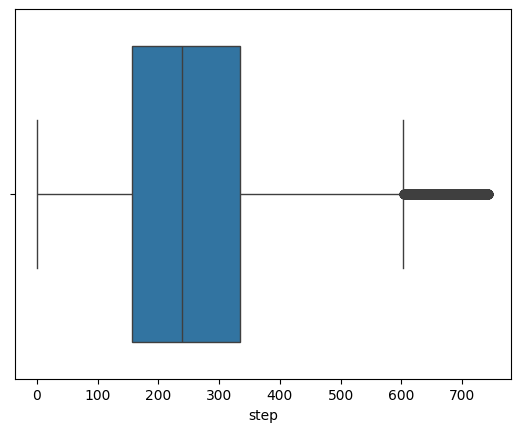

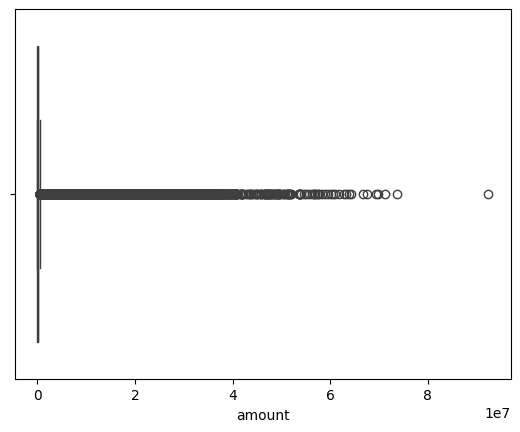

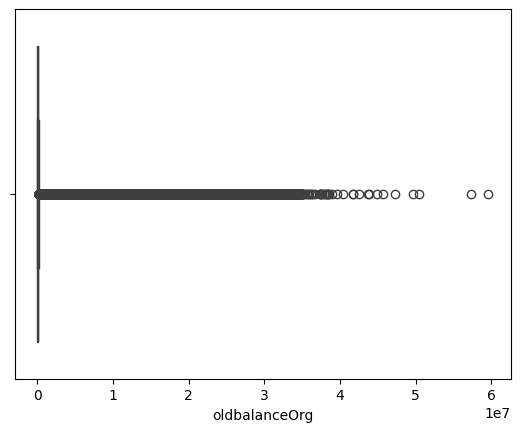

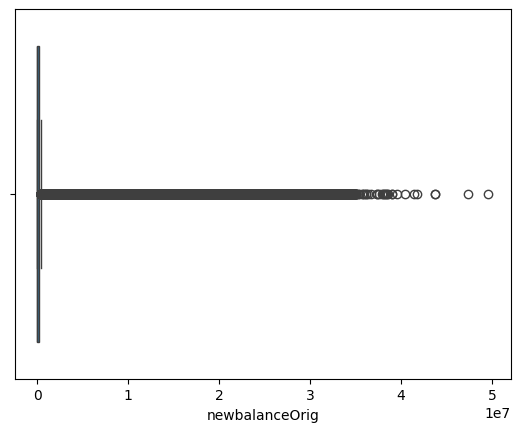

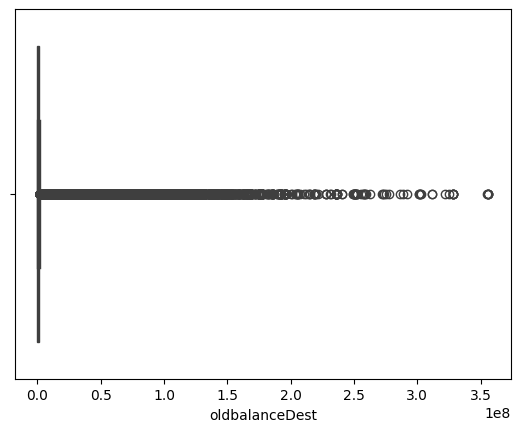

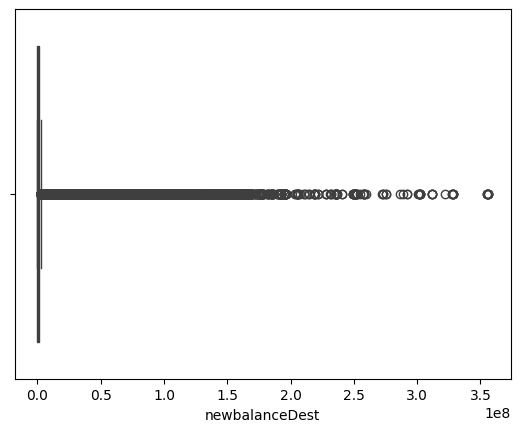

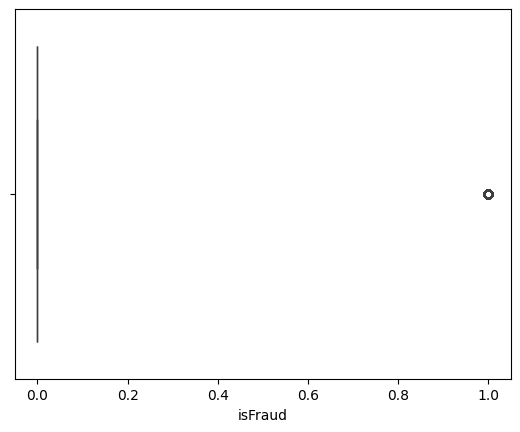

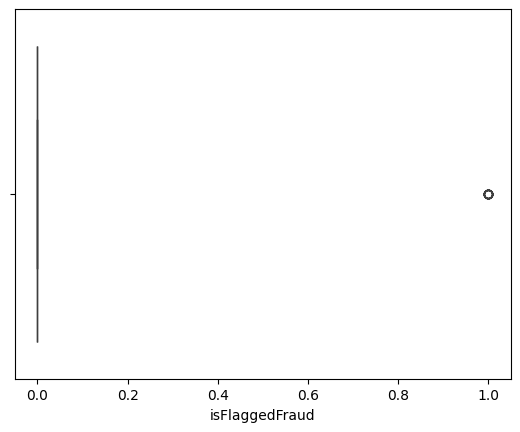

In [ ]:
#boxplot for checking outliers
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df, x=i)
  plt.show()

In [ ]:
print("Unique features:")
df.nunique()

Unique features:


,0
step,743
type,5
amount,5316900
nameOrig,6353307
oldbalanceOrg,1845844
newbalanceOrig,2682586
nameDest,2722362
oldbalanceDest,3614697
newbalanceDest,3555499
isFraud,2


In [ ]:
print("Null Values:")
df.isnull().sum()

Null Values:


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


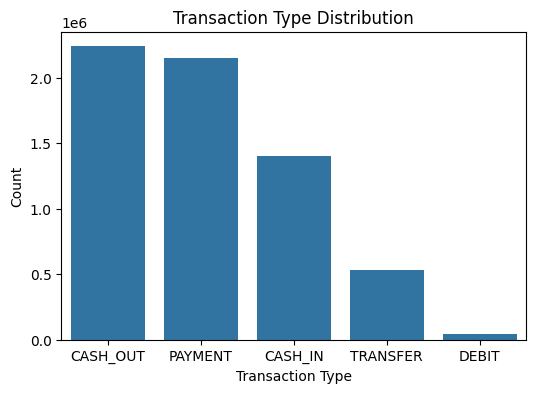

In [ ]:
#Count bar plot for transaction types
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

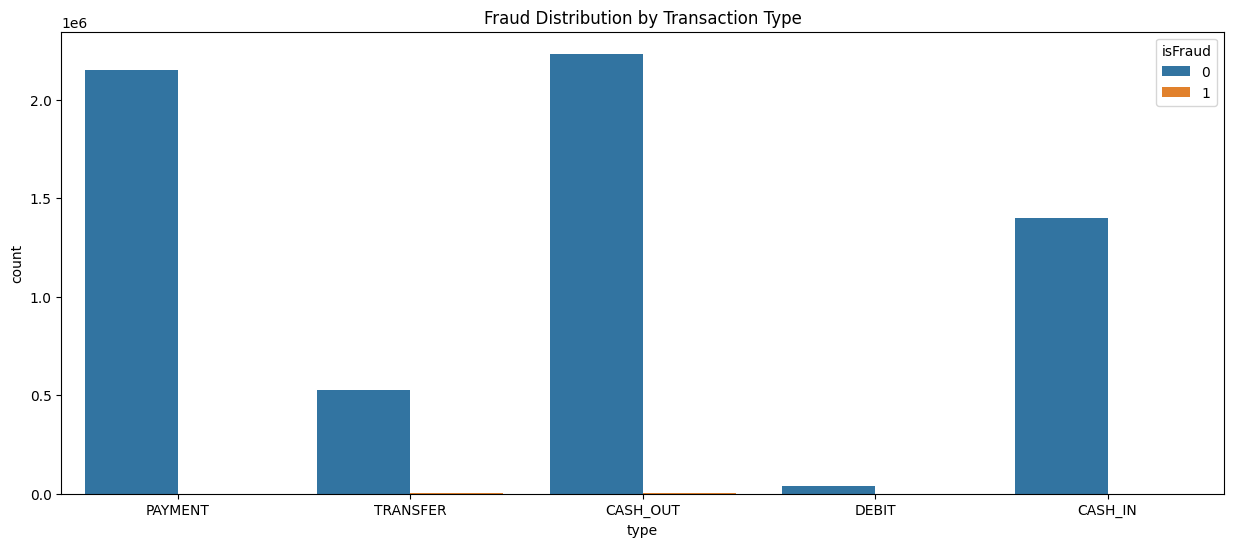

In [ ]:
#Transaction type by fraud
plt.figure(figsize=(15, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Fraud Distribution by Transaction Type')
plt.show()

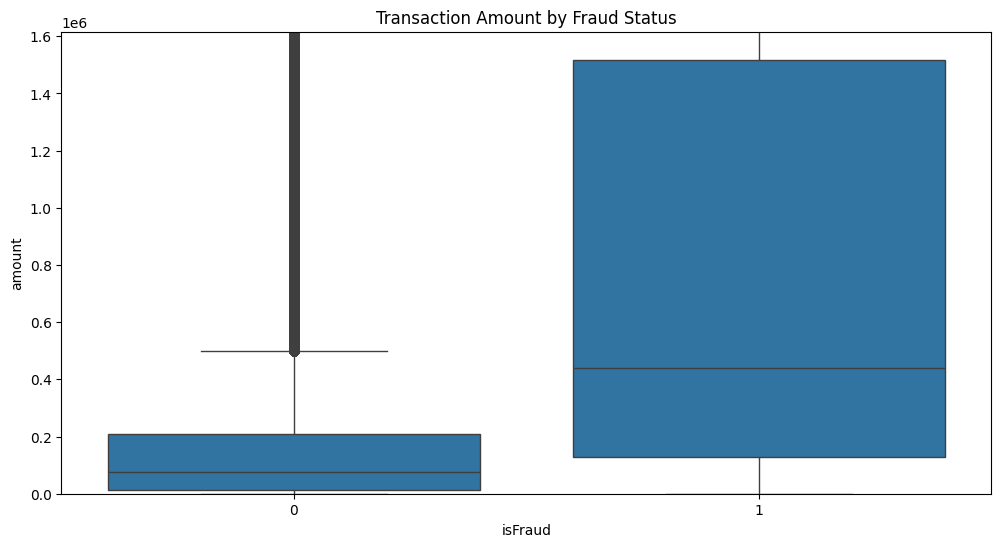

In [ ]:
#Amount vs fraud
plt.figure(figsize=(12, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.ylim(0, df['amount'].quantile(0.99))
plt.title('Transaction Amount by Fraud Status')
plt.show()

In [ ]:
#Data Preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix, roc_curve)
df_new=df.drop(columns=['nameOrig', 'nameDest'],axis=1)#Dropping ID columns
X = df_new.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df_new['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40, stratify=y)
numeric_vals=X.select_dtypes(include= 'number').columns
categoric_vals=X.select_dtypes(include= 'object').columns

#Preprocessing numeric values
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_vals])
X_test_numeric = scaler.transform(X_test[numeric_vals])

# One hot encode for categorical vals
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[categoric_vals])
X_test_cat = encoder.transform(X_test[categoric_vals])

#joining the features using hstack
X_train_processed = np.hstack([X_train_numeric, X_train_cat])
X_test_processed = np.hstack([X_test_numeric, X_test_cat])

In [ ]:
#Training model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.callbacks import EarlyStopping

#logistic regression
model_results = {}
model1=LogisticRegression(max_iter=2000,random_state=40)
model1.fit(X_train_processed, y_train)
y_predict=model1.predict(X_test_processed)
y_probability = model1.predict_proba(X_test_processed)[:, 1]
model_results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_predict),
    'precision': precision_score(y_test, y_predict),
    'recall': recall_score(y_test, y_predict),
    'f1': f1_score(y_test, y_predict),
    'auc': roc_auc_score(y_test, y_probability),
    'confusion_matrix': confusion_matrix(y_test, y_predict),
    'roc_curve': roc_curve(y_test, y_probability)}

#decision tree
dt = DecisionTreeClassifier(max_depth=10,random_state=42)
dt.fit(X_train_processed, y_train)
y_pred_dt = dt.predict(X_test_processed)
y_prob_dt = dt.predict_proba(X_test_processed)[:, 1]
model_results['Decision Tree'] = {
    'accuracy': accuracy_score(y_test, y_pred_dt),
    'precision': precision_score(y_test, y_pred_dt),
    'recall': recall_score(y_test, y_pred_dt),
    'f1': f1_score(y_test, y_pred_dt),
    'auc': roc_auc_score(y_test, y_prob_dt),
    'confusion_matrix': confusion_matrix(y_test, y_pred_dt),
    'roc_curve': roc_curve(y_test, y_prob_dt)
}

#Neural Network
nn_model = Sequential([Input(shape=(X_train_processed.shape[1],)),  # Use processed shape
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')])
nn_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss=BinaryCrossentropy(),
                 metrics=['accuracy'])


early_stop = EarlyStopping(monitor='loss', patience=2)
nn_model.fit(X_train_processed, y_train, epochs=15, batch_size=128, verbose=0,callbacks=[early_stop])

y_prob_nn = nn_model.predict(X_test_processed)
y_pred_nn = y_prob_nn.argmax(axis=1)
model_results['Neural Network'] = {
    'accuracy': accuracy_score(y_test, y_pred_nn),
    'precision': precision_score(y_test, y_pred_nn),
    'recall': recall_score(y_test, y_pred_nn),
    'f1': f1_score(y_test, y_pred_nn),
    'auc': roc_auc_score(y_test, y_prob_nn[:, 1]),
    'confusion_matrix': confusion_matrix(y_test, y_pred_nn),
    'roc_curve': roc_curve(y_test, y_prob_nn[:, 1])
}

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_processed, y_train)
y_pred_knn = knn.predict(X_test_processed)
y_prob_knn = knn.predict_proba(X_test_processed)[:, 1]
model_results['KNN'] = {
    'accuracy': accuracy_score(y_test, y_pred_knn),
    'precision': precision_score(y_test, y_pred_knn),
    'recall': recall_score(y_test, y_pred_knn),
    'f1': f1_score(y_test, y_pred_knn),
    'auc': roc_auc_score(y_test, y_prob_knn),
    'confusion_matrix': confusion_matrix(y_test, y_pred_knn),
    'roc_curve': roc_curve(y_test, y_prob_knn)
}

49708/49708 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step


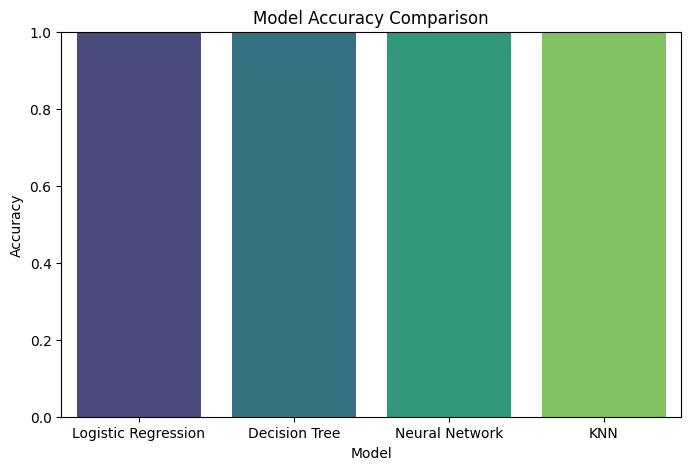

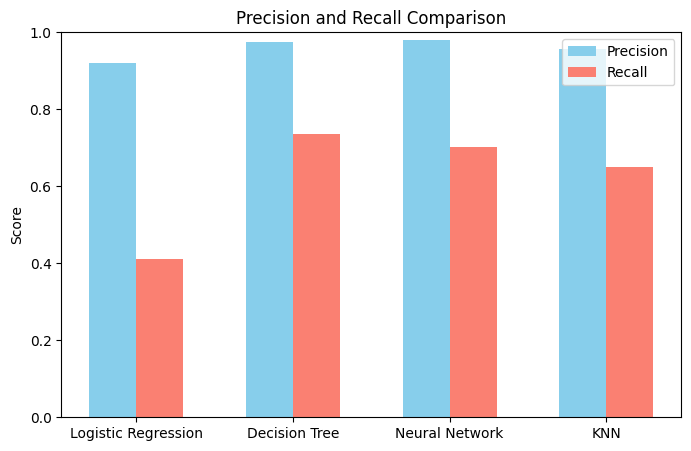

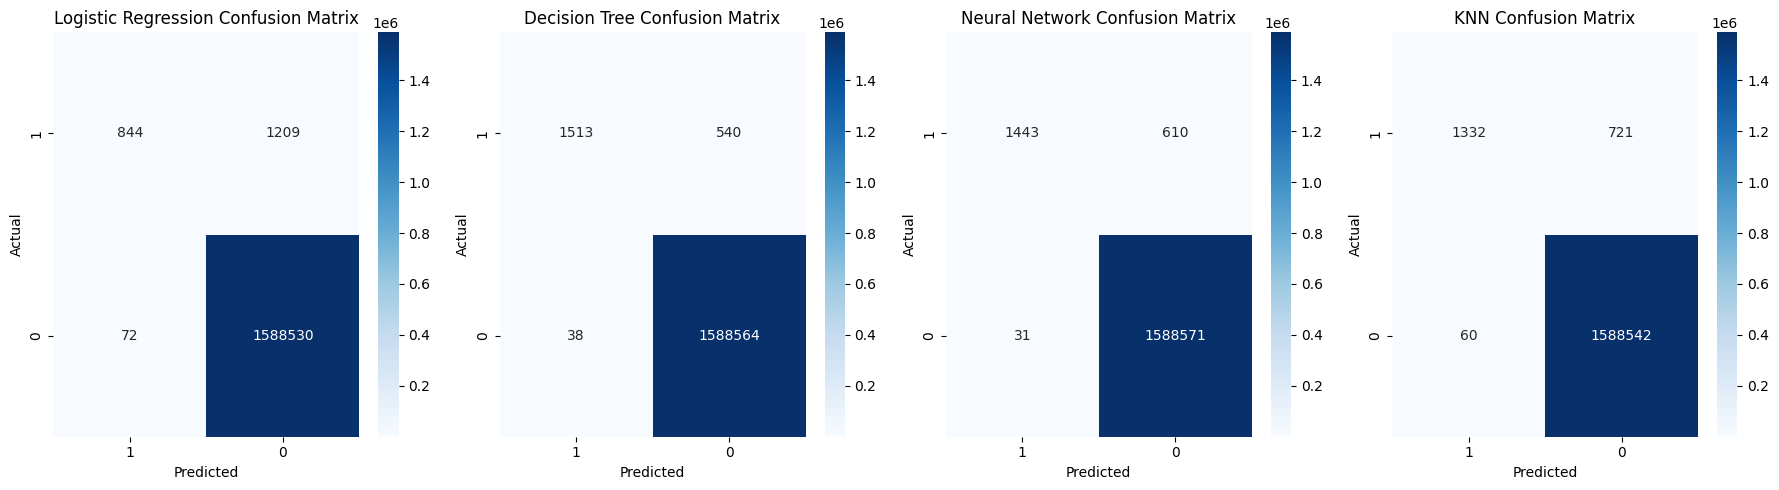

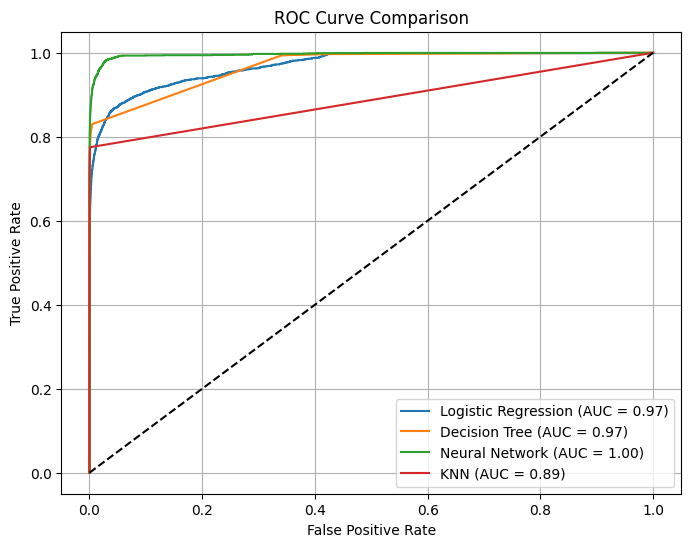

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Extract metrics into lists
models = list(model_results.keys())
accuracies = []
precisions = []
recalls = []
aucs = []
conf_matrices = []
roc_curves = []

for m in models:
    accuracies.append(model_results[m]['accuracy'])
    precisions.append(model_results[m]['precision'])
    recalls.append(model_results[m]['recall'])
    aucs.append(model_results[m]['auc'])
    conf_matrices.append(model_results[m]['confusion_matrix'])
    roc_curves.append(model_results[m]['roc_curve'])

# 1. Accuracy Bar Chart
acc_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
plt.figure(figsize=(8, 5))
sns.barplot(data=acc_df, x='Model', y='Accuracy', hue='Model', palette='viridis', legend=False)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# 2. Precision and Recall Comparison
x = np.arange(len(models))
width = 0.35
plt.figure(figsize=(8, 5))
width=0.30
plt.bar(x - width/2, precisions, width, label='Precision', color='skyblue')
plt.bar(x + width/2, recalls, width, label='Recall', color='salmon')

plt.xticks(ticks=x, labels=models)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Precision and Recall Comparison')
plt.legend()
plt.show()

# 3. Confusion Matrices
fig, axes = plt.subplots(1, len(models), figsize=(18, 5))
for i in range(len(models)):
    matrix = conf_matrices[i]
    model_name = models[i]

    # Reorder matrix to make class 1 the "positive" class
    reordered_matrix = matrix[[1, 0], :][:, [1, 0]]

    sns.heatmap(reordered_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model_name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

    # Set new tick labels to reflect class 1 as positive
    axes[i].set_xticklabels(['1', '0'])
    axes[i].set_yticklabels(['1', '0'])

plt.tight_layout()
plt.show()


# 4. ROC Curves with AUC
plt.figure(figsize=(8, 6))

for i in range(len(models)):
    fpr, tpr, _ = roc_curves[i]
    model_name = models[i]
    auc_score = aucs[i]

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
for i in model_results:
    accuracy = model_results[i]['accuracy']
    precision = model_results[i]['precision']
    recall = model_results[i]['recall']

    print(f"Model: {i}")
    print(f"  Accuracy : {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall   : {recall:.4f}")



Model: Logistic Regression
  Accuracy : 0.9992
  Precision: 0.9214
  Recall   : 0.4111
Model: Decision Tree
  Accuracy : 0.9996
  Precision: 0.9755
  Recall   : 0.7370
Model: Neural Network
  Accuracy : 0.9996
  Precision: 0.9790
  Recall   : 0.7029
Model: KNN
  Accuracy : 0.9995
  Precision: 0.9569
  Recall   : 0.6488
